### Updated Dataset: Ferguson et al. 2015

Data set of CA1 pyramidal cell recordings using an intact whole hippocampus preparation, including recordings of rebound firing.  

Source of data: https://www.zenodo.org/record/17794#.W5j7lBQnYYM

In [1]:
# import modules
from datetime import datetime, tzinfo, timedelta
import hdmf._version
from dateutil.tz import tzlocal
import platform
import math
import numpy as np
import uuid
import os
from os import environ

#https://pypi.org/project/pyabf/
import pyabf

import pynwb
print('Using pynwb v%s'%pynwb.__version__)
from pynwb.icephys import CurrentClampStimulusSeries, CurrentClampSeries



Using pynwb v1.3.0


In [2]:
# User provided arguments
try:
    # if running build.py
    file_number = int(environ['file_number'])
    save_nwb = True 
    show_plots = False
    
except:
    # default values if viewing Notebook
    file_number = 0 
    save_nwb = False
    show_plots = True
    
    
save_plots = True


## Overview of all data sets

In [3]:
all_files = ['PYR1.abf','PYR2.abf','PYR3.abf','PYR4.abf','PYR5_rebound.abf']

for f in all_files:
    abf = pyabf.ABF(f) # read one data set

    print("--- Loaded file: %s"%abf)

    abf.setSweep(1) # sweeps start at 0

    print('Times info (%i points): %s'%(len(abf.sweepX),abf.sweepX)) # sweep times (seconds)
    print('Current info (%i points): %s'%(len(abf.sweepY),abf.sweepY)) # sweep data (ADC)



--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc10pA1s".
Times info (20000 points): [0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]
Current info (20000 points): [-23.4985 -25.0244  -4.5776 ... -10.0708 -15.2588 -10.0708]
--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 13 sweeps, having no tags, with a total length of 0.47 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc25pA1s".
Times info (20000 points): [0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]
Current info (20000 points): [-86.3647 -68.9697 -82.0923 ... -85.144  -81.7871 -75.9888]
--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 34 sweeps, having no tags, with a total length of 1.17 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc

--- Loaded file (PYR1.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc10pA1s".


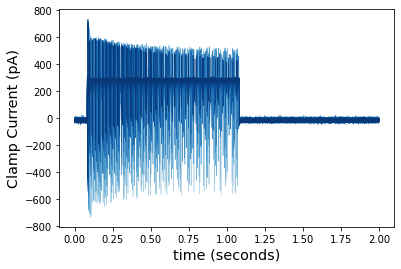

--- Loaded file (PYR2.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 13 sweeps, having no tags, with a total length of 0.47 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc25pA1s".


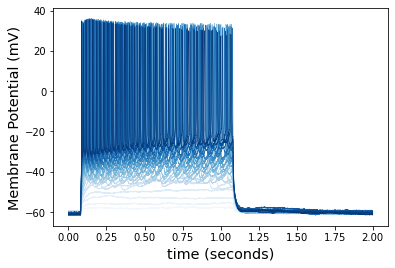

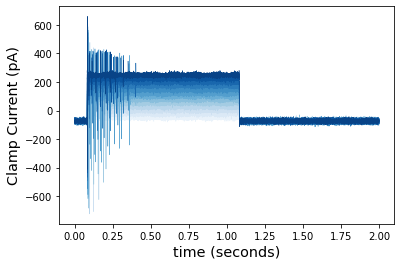

--- Loaded file (PYR3.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 34 sweeps, having no tags, with a total length of 1.17 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc10pA1s".


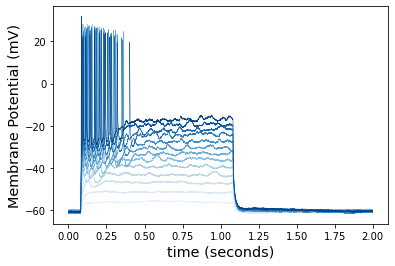

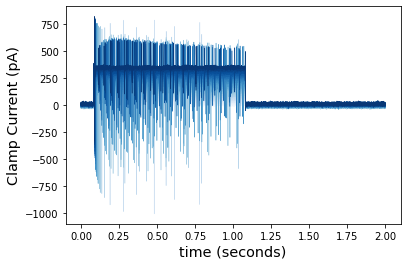

--- Loaded file (PYR4.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc10pA1s".


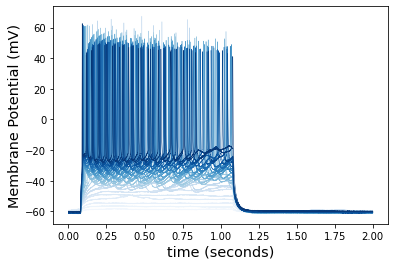

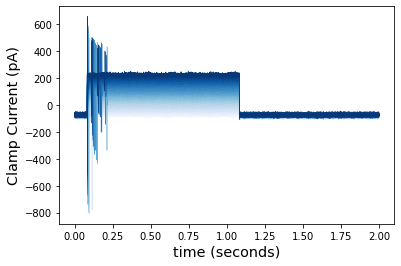

--- Loaded file (PYR5_rebound.abf): ABF (version 1.8.3.0) with 2 channels (nA, mV), sampled at 10.0 kHz, containing 10 sweeps, having no tags, with a total length of 0.37 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc-25pA1s".


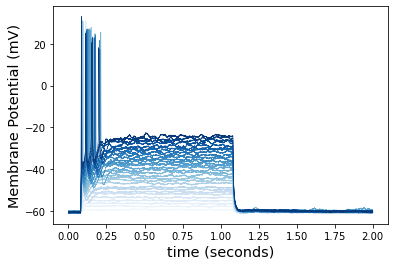

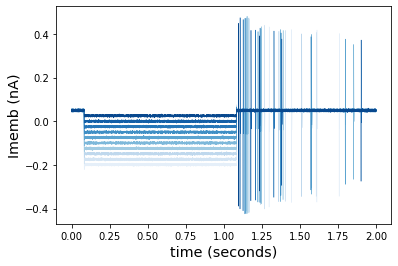

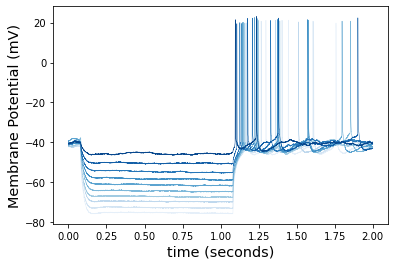

In [4]:
if show_plots:
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline  

    for f in all_files:
        abf = pyabf.ABF(f) # read one data set
        reference = f.split('.')[0]

        print("--- Loaded file (%s): %s"%(f,abf))
        max = abf.sweepCount
        
        # sort current steps
        bounds = []
        
        for i in range(max):
            abf.setSweep(i, channel=0) # sweeps start at 0
            
            y = abf.sweepY
            y_bound = np.mean(y) #if not 'rebound' in f else np.min(y)
            bounds.append(y_bound)

        sorted_is = np.argsort(bounds)
        

        #### Clamped currents ####
        fig = plt.figure()
        
        colors = sns.color_palette("Blues",max)
        
        # sorted order of current steps
        for ci, i in enumerate(sorted_is):

            abf.setSweep(i, channel=0) # sweeps start at 0
            plt.plot(abf.sweepX, abf.sweepY, c=colors[ci],lw=.5, label='Sweep %i'%i)
            plt.ylabel(abf.sweepLabelY,size='x-large')
            plt.xlabel(abf.sweepLabelX,size='x-large')
            #plt.legend()

        plt.show()

        if not save_plots:
            plt.show()

        else:
            fig_name = 'FergusonEtAl2015%s_current.png'%('' if 'PYR1' in f
                                                    else '_%s'%reference)
            fig_file = os.path.join('images',fig_name)
            fig.savefig(fig_file,bbox_inches='tight')


        #### Voltage responses ####
        fig = plt.figure()

        for ci, i in enumerate(sorted_is):
            abf.setSweep(i, channel=1) # sweeps start at 0
            plt.plot(abf.sweepX, abf.sweepY,c=colors[ci], lw=.5, label='Sweep %i'%i)
            plt.ylabel(abf.sweepLabelY,size='x-large')
            plt.xlabel(abf.sweepLabelX,size='x-large')
            #plt.legend()

        if not save_plots:
            plt.show()

        else:
            fig_name = 'FergusonEtAl2015%s_voltage.png'%('' if 'PYR1' in f
                                                    else '_%s'%reference)
            fig_file = os.path.join('images',fig_name)
            fig.savefig(fig_file,bbox_inches='tight')




    

## Global variables

In [5]:
# info needed for all files
cells = ['Pyramidal cell 1, strongly adapting',
         'Pyramidal cell 2, strongly adapting',
         'Pyramidal cell 3, weakly adapting',
         'Pyramidal cell 4, weakly adapting',
         'Pyramidal cell 5, rebound firing']

current_steps = [10.,25.,10.,10.,-25.] # pA
initial_currents = [-1.3,-48.8,2.0,-47.9,0.0] # pA   



In [6]:
# random UUID for globally unique tag
unique_identifier = uuid.uuid4()



In [7]:
# greek unicode
ohm = '\u03A9'
micro = '\u03BC'



In [8]:
# import specific file
cell = cells[file_number]
f = all_files[file_number]
current_step = current_steps[file_number]
initial_current = initial_currents[file_number]
abf = pyabf.ABF(f)



In [9]:
# create main file elements
reference = f.split('.')[0]

create_date = datetime.now(tz=tzlocal())

import hdmf._version
hdmf_ver = 'v%s'%hdmf._version.get_versions()['version']

notes = 'NWB2 file with ephys created with pynwb v%s (HDMF %s) and Python %s' %(pynwb.__version__,hdmf_ver,platform.python_version())

stim_notes = 'Depolarizing current steps, aCSF perfusion rate of 20-25 ml/min, temperature 30+/- 2 celsius'
print(notes)
print(stim_notes)



NWB2 file with ephys created with pynwb v1.3.0 (HDMF v1.6.4) and Python 3.7.7
Depolarizing current steps, aCSF perfusion rate of 20-25 ml/min, temperature 30+/- 2 celsius


In [10]:
date, time = abf.abfDateTimeString.split('T')

date = date.split('-')
time = time.split(':')

year, month, day = int(date[0]), int(date[1]), int(date[2])
hour, minute = int(time[0]), int(time[1])
sec = int(time[2].split('.')[0])


# for McGill Uni in Montreal, Quebec
class TZ(tzinfo):
    def utcoffset(self, dt):
        return -timedelta(hours=4)
    def dst(self, dt):
        return timedelta(0)
    def tzname(self,dt):
        return "-04:00"
    def  __repr__(self):
        return f"{self.__class__.__name__}()"

start_time = datetime(year,month,day,hour,minute,sec,tzinfo=TZ())



In [11]:
# subject-related elements
subject = pynwb.file.Subject(
    species='transgenic mouse',
    genotype='PV-tdTomato',
    sex='Unspecified', # unspecified in publication                          ## Publication says 3 mice with 2 females, but cells are not explicit
    age='P20D-P90D'                                                          ## ISO 8601 Duration format
)


protocol = abf.protocol

nwbfile = pynwb.NWBFile(
             session_description='Ferguson et al. %s [%s]'%(f,cell),
             identifier=str(unique_identifier),                                   
             session_start_time=start_time,
             file_create_date=create_date,
             notes=notes,
             experimenter='Katie A. Ferguson',
             experiment_description=('Data set of CA1 pyramidal cell '
                                        'recordings using an intact whole '
                                        'hippocampus preparation, including '
                                        'recordings of rebound firing'),
             institution='University of Toronto',
             lab='Skinner Lab',

            # subject-related field
            subject=subject,                                                 ## See subject class above

            # recording-related fields
            protocol=protocol,
            stimulus_notes=stim_notes,
            pharmacology=('synaptic blockers: 5 %sM '
                            '6,7-dinitroquinoxaline-2,3-dione disodium '
                            'salt(DNQX), 5 %sM  bicuculline and 25 %sM '
                            'DL-2-amino-5-phosphonopentanoic acid '
                            'sodium salt (DL-AP5) '
                            '(Abcam, Toronto, Canada)')%(micro,micro,micro),
            keywords=['pyramidal cells','neuroscience','patch clamps']
    )

In [12]:
# device metadata
device = nwbfile.create_device(name='device',
                               description=('Axopatch-1C amplifier (Axon '
                                            'Instruments) and '
                                            'pClamp9 software'),
                               manufacturer=('Molecular Devices, '
                                            'Sunnyvale, CA'))

slice_prep = '~45 degree cut from surface'
location = ('pyramidal cell layer, middle portion of hippocampus '
        '(intermediate between septal and temporal poles of preparation)')


electrode = nwbfile.create_icephys_electrode(name='icephys_electrode',       ## Give preference to default processing module names.
                            description=('Patch pipettes pulled from '
                                        'borosilicate glass capillaries '
                                        '(2.5-4 M%s)')%ohm,
                            slice=slice_prep,
                            location=location,
                            device=device,
)

## Sweep-specific information

In [13]:
# file specific data + metadata
max_sweeps = abf.sweepCount

# sort current steps
bounds = []

for i in range(max_sweeps):
    abf.setSweep(i, channel=0) # sweeps start at 0

    y = abf.sweepY
    y_bound = np.mean(y) #if not 'rebound' in f else np.min(y)
    bounds.append(y_bound)

sorted_is = np.argsort(bounds)



for sweep_i, sweep in enumerate(sorted_is):
    channel = 0
    sweep_number = sweep_i+1

    abf.setSweep(sweep,channel=channel) # channel 0 = clamp current channel


    # add clamp current data
    data = abf.sweepY
    timestamps = abf.sweepX

    
    # convert data to SI units
#     unit = abf.adcUnits[channel] # Only used to check original units
    if not 'PYR5_rebound' in f:
        conversion = 1e-12 # pA->A
    else:
        conversion = 1e-9 # nA->A
        
    data = conversion*data
    conversion = 1.0 # reset conversion factor

    
    # recording session
    sampling_rate = 1000.*abf.dataPointsPerMs # kHz -> Hz (specify this or timestamps)

    inj_current = sweep * current_step + initial_current
    description = ('Sweep %i, applied current'
                    '(pulse ~%s pA%s)')%(sweep_number,inj_current,
                                        '' if not 'PYR5_rebound' in f
                                        else ', cell held at -52mV')
    
    gain = 1. # Unspecified placeholder                                      ## Assumed unity gain amplifier

    csss = CurrentClampStimulusSeries(
                             name='CurrentClampStimulusSeries_%s'%(sweep_number      ## As a default, name class instances with the same name as the class
                                                        if sweep_number>9
                                                        else '0'+str(sweep_number)), ## Pad sweeps for visual aesthetic in NWBExplorer
                             description=description,
                             stimulus_description=protocol + ' protocol',
                             sweep_number=sweep_number,

                             data=data,
                             rate=sampling_rate,
                             unit='amperes',
                             conversion=conversion,

                             electrode=electrode,
                             gain=gain,

                             comments='Extracted from ABF file: %s'%f
            )
    
    # Update NWB File
    nwbfile.add_stimulus(csss)



In [14]:
# file specific data + metadata
max_sweeps = abf.sweepCount

for sweep_i, sweep in enumerate(sorted_is):
    channel = 1
    sweep_number = sweep_i+1

    abf.setSweep(sweep,channel=channel) # channel 1 = voltage response


    # add voltage data
    data = abf.sweepY
    sampling_rate = 1000.*abf.dataPointsPerMs # ms->S                        ## If sampling rate is constant, use rate instead of timestamps
    # timestamps = abf.sweepX                                                ## In addition, timestamps don't represent absolute time with inter-stimulus interval times
    
    # convert data to SI units
#     unit = abf.adcUnits[channel] # Only used to check original units
    conversion = 1e-3 # mV->V
    data = conversion*data
    conversion = 1.0 # reset conversion factor

    inj_current = sweep * current_step + initial_current
    description = ('Sweep %i, membrane potential response '
                    '(To pulse ~%s pA%s)')%(sweep_number,inj_current,
                                        '' if not 'PYR5_rebound' in f
                                        else ', cell held at -52mV')

    gain = 1.                                                                ## Assumed unity gain amplifier

    css = CurrentClampSeries(
                     name='CurrentClampSeries_%s'%(sweep_number              ## As a default, name class instances with the same name as the class
                                                if sweep_number>9
                                                else '0'+str(sweep_number)), ## Pad sweeps for visual aesthetic in NWBExplorer
                     description=description,
                     stimulus_description=protocol + ' protocol',
                     sweep_number=sweep_number,

                     data=data,
                     rate=sampling_rate,
                     unit='volts',
                     conversion=conversion,

                     electrode=electrode,
                     gain=gain,

                     comments=('Estimated junction potential: -15.2 mV,'
                                'Extracted from ABF file: %s')%f,
    )
    
    # Update NWB file
    nwbfile.add_acquisition(css)
    
    

## Save NWB file

In [15]:
if save_nwb:
    nwb_file_name = 'FergusonEtAl2015%s.nwb'%('' if 'PYR1' in f
                                                    else '_%s'%reference)

    io = pynwb.NWBHDF5IO(nwb_file_name, mode='w')
    io.write(nwbfile)
    io.close()
    print("Written NWB file to %s"%nwb_file_name)
    
    

## To check NWB file

In [16]:
import sys
sys.path.append("../NWB")

import nwb_info

nwb_info.print_info('FergusonEtAl2015.nwb', verbose=False)

NWB info

Info on FergusonEtAl2015.nwb (5169432 bytes; modified: Thu Sep  3 17:01:28 2020)
    Attr   .specloc =	 <HDF5 object reference>
    Attr   namespace =	 core
    Attr   neurodata_type =	 NWBFile
    Attr   nwb_version =	 2.2.2
    Attr   object_id =	 4252bbf1-f4f1-4a63-95e8-82e9354d95ba
    Field  lab =	 Skinner Lab
    Field  experimenter =	 ['Katie A. Ferguson']
    Field  institution =	 University of Toronto
    Field  lab =	 Skinner Lab
    Field  notes =	 NWB2 file with ephys created with pynwb v1.3.0 (HDMF v1.6.4) and Python 3.7.7
Successfully read file with h5py v2.10.0

Loaded without Silverlab extensions
Successfully opened file with pynwb v1.3.0
    name = root
    notes = NWB2 file with ephys created with pynwb v1.3.0 (HDMF v1.6.4) and Python 3.7.7
    subject = subject pynwb.file.Subject at 0x140281087399184
Fields:
  age: P20D-P90D
  genotype: PV-tdTomato
  sex: Unspecified
  species: transgenic mouse

    experimenter = ('Katie A. Ferguson',)
Notes: NWB2 file wit

root pynwb.file.NWBFile at 0x140281367058832
Fields:
  acquisition: {
    CurrentClampSeries_01 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_02 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_03 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_04 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_05 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_06 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_07 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_08 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_09 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_10 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_11 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_12 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_13 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeri

In [17]:
print("Finished. Saved NWB file: %s"%save_nwb)

Finished. Saved NWB file: False
